In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import os

plt.rcParams["figure.dpi"] = 140
from scipy.optimize import leastsq

#import pandas as pd
dataPath = '/eno/jdfeathe/DATA/SpringConstant/'


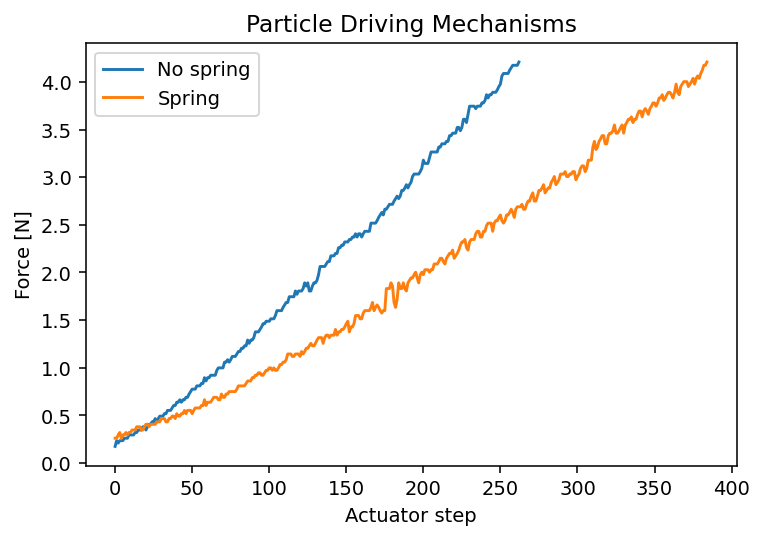

In [2]:
# Found for EMPANADA data; couldn't hurt to redo this measurement though
loadCellToNewtonsFactor = .00859
cropStart = [350, 520]

fArr = np.genfromtxt(dataPath + 'SpringConst_3p.CSV')[cropStart[0]:,1] * loadCellToNewtonsFactor
fSprArr = np.genfromtxt(dataPath + 'SpringConst_2p1spp.CSV')[cropStart[1]:,1] * loadCellToNewtonsFactor

plt.plot(fArr, label='No spring')
plt.plot(fSprArr, label='Spring')

plt.xlabel('Actuator step')
plt.ylabel('Force [N]')

plt.title('Particle Driving Mechanisms')
plt.legend()
plt.savefig('spring_constant.png')
plt.show()

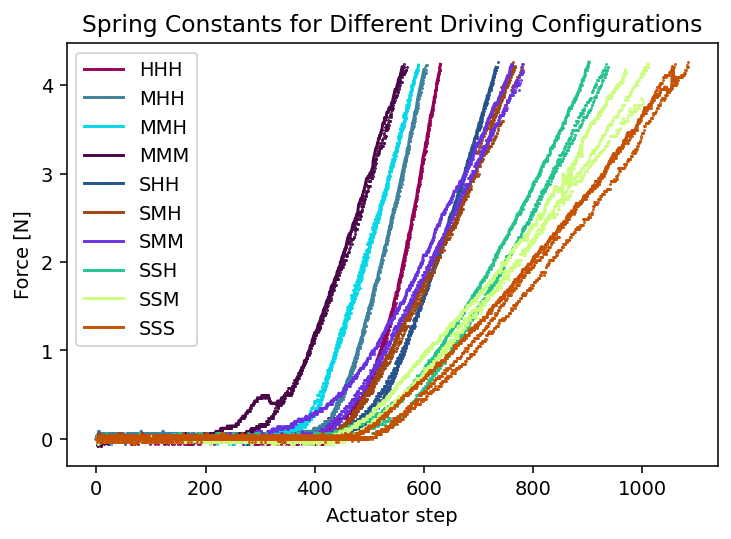

In [80]:
fileList = os.listdir(dataPath)
fileList = [f for f in np.sort(fileList) if f[:3] == 'SPR']
loadCellToNewtonsFactor = .00859

springConstants = {}
seed = 26
np.random.seed(seed)

configurations = np.unique([f.split('_')[1] for f in fileList])
colors = np.random.choice(list(mcolors.XKCD_COLORS.values()), len(configurations))

colorDict = dict(zip(configurations, colors))

for i in range(len(fileList)):
    configuration = fileList[i].split('_')[1]
    
    fArr = np.genfromtxt(dataPath + fileList[i])[:,1] * loadCellToNewtonsFactor
    #tArr = [t for t in np.genfromtxt(dataPath + fileList[i], dtype=object)[:,1]]
    #print(tArr)
    #fArr = fArr[9*len(fArr)//10:]
    fArr -= fArr[0]
    
    tArr = np.arange(len(fArr))
    slope = np.linalg.lstsq(tArr[:,None], fArr, rcond=None)

    if configuration in springConstants.keys():
        springConstants[configuration] += [slope[0]]
        plt.plot(tArr, fArr, 'o', markersize=.5, c=colorDict[configuration])

    else:
        springConstants[configuration] = [slope[0]]
        plt.plot(tArr, fArr, '-o', markersize=.5, c=colorDict[configuration], label=configuration)
        
    #plt.plot(tArr, tArr*slope[0])
    
#tArr = np.arange(100)
#for k,v in springConstants.items():
    #plt.plot(tArr, np.mean(v)*tArr, label=k, c=colorDict[k])
    
plt.xlabel('Actuator step')
plt.ylabel('Force [N]')
plt.title('Spring Constants for Different Driving Configurations')
plt.legend()

#plt.savefig('Images/SpringConstants_Full.png')
plt.show()